### Multi-wavelength CDI

In [1]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift

import multiwavelength_cdi as mw
from matplotlib import pylab as plt
%matplotlib inline

In [2]:
#Spectral intensities
S = np.load('../data/S.npy')

#Wavelengths
lambs = np.load('../data/lambs.npy')

#Amplitude data
g = np.load('../data/amp_data.npy') 
#Supports
sups = np.load('../data/supports.npy')

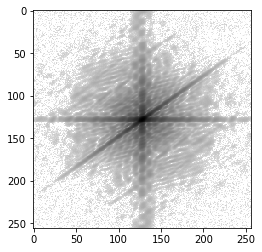

In [3]:
#Intensity log-scale
plt.imshow(fftshift(np.log10(np.maximum(g**2,0.5))), cmap='gray_r');

-----------------
### Multi-wavelength CDI

In [4]:
#Setup algorithm, support and experimental parameters
ap = mw.par.Alg_Par(ep=1e-5,S_constraint=1)
sp = mw.par.Sup_Par()
ep = mw.par.Exp_Par(lamb=lambs,spec_int=S)


#Create Multi-wavelength ERHIO class instance
mwcdi = mw.alg.MWERHIO(g, sp, ap, ep, sup=sups)

In [5]:
#Run for 750 iterations (5 cycles of MWERHIO)
mwcdi.run(cycles=5)

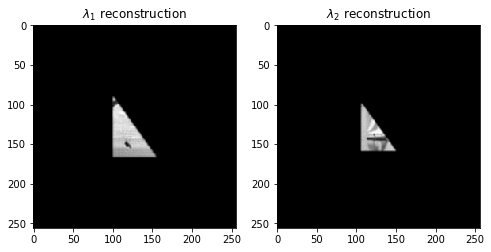

In [6]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(fftshift(np.abs(mwcdi.u[0,:,:])), cmap='gray')
plt.title('$\lambda_1$ reconstruction');
plt.subplot(122)
plt.imshow(fftshift(np.abs(mwcdi.u[1,:,:])), cmap='gray');
plt.title('$\lambda_2$ reconstruction');

------------------------------
### Monochromatic CDI

In [7]:
#ERHIO (monochromatic)
cdi = mw.alg.ERHIO(g, sp, ap, ep, sup=sups[0,:,:])

In [8]:
#Run algorithm for 750 iterations (5 cycles of ERHIO)
cdi.run(cycles=5)

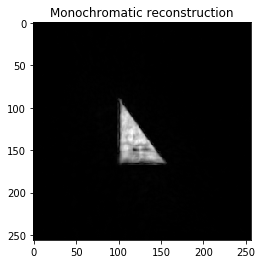

In [9]:
plt.imshow(fftshift(np.abs(cdi.u)), cmap='gray');
plt.title('Monochromatic reconstruction');